In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Group 3
# Yayu Zhu (MIT ID: 915458441)
# Raghav Kedia (MIT ID: 919262178)
# Kaidi (Katie) Wang (MIT ID: 922892344)
# Yuqing (Yuki) Zhang  (MIT ID: 915038752)


def read_csv(filename):
    return pd.read_csv(filename)

data_annual = read_csv("returns_annual.csv")
data_monthly = read_csv("returns_monthly.csv")
data_daily = read_csv("returns_daily.csv")

In [2]:
#### Q3A & Q3B ####

def print_stats(df, frequency):
    print("Statistics for " + frequency + " frequency:")
    print("---------")
    print("Market:")
    print("Mean Market Return: ", df["mktret"].mean())
    print("Var Market Return: ", df["mktret"].var())
    print("Std Dev Market Return: ", df["mktret"].std())
    print("Skewness Market Return: ", stats.skew(df["mktret"]))
    print("Kurtosis Market Return: ", stats.kurtosis(df["mktret"], fisher=False))
    print("")
    print("Bond:")
    print("Mean Bond Return: ", df["bondret"].mean())
    print("Var Bond Return: ", df["bondret"].var())
    print("Std Dev Bond Return: ", df["bondret"].std())
    print("Skewness Bond Return: ", stats.skew(df["bondret"]))
    print("Kurtosis Bond Return: ", stats.kurtosis(df["bondret"], fisher=False))
    print("")
    print("Covariance and Correlation:")
    print("Covariance Market and Bond: ", df["mktret"].cov(df["bondret"]))
    print("Correlation Market and Bond: ", df["mktret"].corr(df["bondret"]))
    print("=============")
    
print_stats(data_annual, "Annual")
print_stats(data_monthly, "Monthly")
print_stats(data_daily, "Daily")

Statistics for Annual frequency:
---------
Market:
Mean Market Return:  0.1291701184210526
Var Market Return:  0.029340964041172455
Std Dev Market Return:  0.17129204313444468
Skewness Market Return:  -0.4775892913904892
Kurtosis Market Return:  3.1311126577407227

Bond:
Mean Bond Return:  0.06185558113157894
Var Bond Return:  0.013166461852800432
Std Dev Bond Return:  0.11474520405141311
Skewness Bond Return:  0.7887427404848776
Kurtosis Bond Return:  3.6661445683778977

Covariance and Correlation:
Covariance Market and Bond:  -0.0016774091391614685
Correlation Market and Bond:  -0.08534287570723285
Statistics for Monthly frequency:
---------
Market:
Mean Market Return:  0.009967116279069769
Var Market Return:  0.001765227586140566
Std Dev Market Return:  0.042014611579075274
Skewness Market Return:  -0.5433432582769412
Kurtosis Market Return:  4.900991714606362

Bond:
Mean Bond Return:  0.004968034883720931
Var Bond Return:  0.0007646066116437375
Std Dev Bond Return:  0.0276515209643

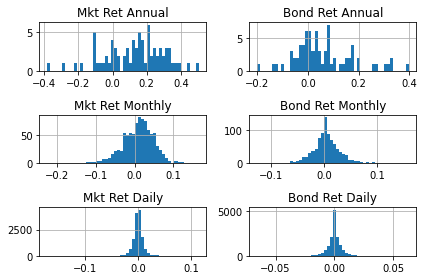

In [3]:
#### Q3C ####

def histogram(df_annual, df_monthly, df_daily):
    fig, axes = plt.subplots(3,2)

    df_annual["mktret"].hist(bins=50, ax=axes[0,0])
    df_annual["bondret"].hist(bins=50, ax=axes[0, 1])
    df_monthly["mktret"].hist(bins=50, ax=axes[1, 0])
    df_monthly["bondret"].hist(bins=50, ax=axes[1, 1])
    df_daily["mktret"].hist(bins=50, ax=axes[2, 0])
    df_daily["bondret"].hist(bins=50, ax=axes[2, 1])

    axes[0,0].set_title("Mkt Ret Annual")
    axes[0, 1].set_title("Bond Ret Annual")
    axes[1, 0].set_title("Mkt Ret Monthly")
    axes[1, 1].set_title("Bond Ret Monthly")
    axes[2, 0].set_title("Mkt Ret Daily")
    axes[2, 1].set_title("Bond Ret Daily")

    fig.tight_layout()

    plt.show()

histogram(data_annual, data_monthly, data_daily)

In [4]:
#### Q3D ####

def confidence_interval(mean, std):
    v = 1.960 * std
    return (mean - v, mean + v)

def confidence_interval_30(mean, std, n):
    se = std / np.sqrt(n)
    return confidence_interval(mean, se)

def confidence_intervals(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_std = df["mktret"].std()
    bond_mean = df["bondret"].mean()
    bond_std = df["bondret"].std()
    print("Mkt Ret Conf Interval 1 period " + frequency, confidence_interval(mkt_mean, mkt_std))
    print("Bond Ret Conf Interval 1 period " + frequency, confidence_interval(bond_mean, bond_std))
    print("Mkt Ret Conf Interval 30 period " + frequency, confidence_interval_30(mkt_mean, mkt_std, 30))
    print("Bond Ret Conf Interval 30 period " + frequency, confidence_interval_30(bond_mean, bond_std, 30))
    print("==================")
    
confidence_intervals(data_annual, "Annual")
confidence_intervals(data_monthly, "Monthly")
confidence_intervals(data_daily, "Daily")

Mkt Ret Conf Interval 1 period Annual (-0.20656228612245894, 0.46490252296456414)
Bond Ret Conf Interval 1 period Annual (-0.16304501880919076, 0.2867561810723486)
Mkt Ret Conf Interval 30 period Annual (0.06787404800307555, 0.19046618883902966)
Bond Ret Conf Interval 30 period Annual (0.020794537203577414, 0.10291662505958046)
Mkt Ret Conf Interval 1 period Monthly (-0.07238152241591778, 0.0923157549740573)
Bond Ret Conf Interval 1 period Monthly (-0.04922894620647063, 0.059165015973912494)
Mkt Ret Conf Interval 30 period Monthly (-0.005067619385292717, 0.025001851943432254)
Bond Ret Conf Interval 30 period Monthly (-0.004926934813538685, 0.014863004580980547)
Mkt Ret Conf Interval 1 period Daily (-0.018596922381075964, 0.019435197049445123)
Bond Ret Conf Interval 1 period Daily (-0.010589100310864793, 0.010663362565245159)
Mkt Ret Conf Interval 30 period Daily (-0.0030527042861199097, 0.0038909789544890666)
Bond Ret Conf Interval 30 period Daily (-0.0019029444261075745, 0.00197720668

Annual Market Shortfal probabilities:  [0.027322420467431708, 0.0904659518825392, 0.22539671167623715, 0.43238920950353343, 0.6603811681860722]
Annual Bond Shortfal probabilities:  [0.011242862861758223, 0.07918644300612793, 0.294919626260373, 0.6302166222838027, 0.8856903775538836]
----------


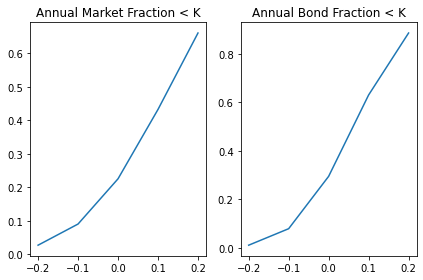

Monthly Market Shortfal probabilities:  [2.9042412555830484e-07, 0.0044307179679325265, 0.4062392744857532, 0.9839392181265977, 0.9999969518108015]
Monthly Bond Shortfal probabilities:  [6.195103180795859e-14, 7.349408251471248e-05, 0.42870744014417445, 0.9997056542249291, 0.9999999999991258]
----------


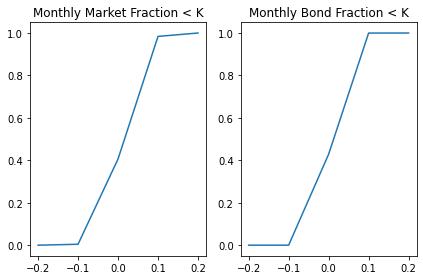

Daily Market Shortfal probabilities:  [4.1915564742744085e-95, 2.0863566876478327e-25, 0.48277072986473735, 1.0, 1.0]
Daily Bond Shortfal probabilities:  [2.610818284077766e-298, 2.5232476508914628e-76, 0.49726774263845525, 1.0, 1.0]
----------


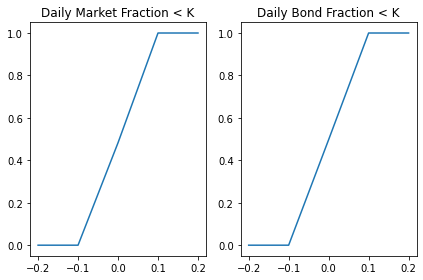

In [5]:
#### Q3E ####

## Helper function for plotting
def plot(frequency, mkt_probs, bond_probs, k):
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(k, mkt_probs)
    ax[1].plot(k, bond_probs)
    ax[0].set_title(frequency + " Market Fraction < K")
    ax[1].set_title(frequency + " Bond Fraction < K")

    fig.tight_layout()
    
    plt.show()

def shortfall_plot(df, frequency):
    k = [-.2, -.1, 0, .1, .2]
    mkt_mean = df["mktret"].mean()
    mkt_std = df["mktret"].std()
    bond_mean = df["bondret"].mean()
    bond_std = df["bondret"].std()

    mkt_probs = []
    bond_probs = []

    for i in k:
        mkt_probs.append(stats.norm(mkt_mean, mkt_std).cdf(i))
        bond_probs.append(stats.norm(bond_mean, bond_std).cdf(i))
    
    print(frequency + " Market Shortfal probabilities: ", mkt_probs)
    print(frequency + " Bond Shortfal probabilities: ", bond_probs)
    print("----------")
    
    plot(frequency, mkt_probs, bond_probs, k)
    
shortfall_plot(data_annual, "Annual")
shortfall_plot(data_monthly, "Monthly")
shortfall_plot(data_daily, "Daily")

In [6]:
#### Q3F ####

def prob_stock_lower_than_bond(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_var = df["mktret"].var()
    bond_mean = df["bondret"].mean()
    bond_var = df["bondret"].var()

    diff_mean = bond_mean - mkt_mean
    cov = df["mktret"].cov(df["bondret"])
    diff_var = bond_var + mkt_var - 2*cov


    prob = 1 - stats.norm.cdf((0 - diff_mean) / np.sqrt(diff_var))
    print("Probability Bond Ret > Stock Ret " + frequency + ": ", prob)
    
prob_stock_lower_than_bond(data_annual, "Annual")
prob_stock_lower_than_bond(data_monthly, "Monthly")
prob_stock_lower_than_bond(data_daily, "Daily")

Probability Bond Ret > Stock Ret Annual:  0.37663647702579894
Probability Bond Ret > Stock Ret Monthly:  0.459317144494223
Probability Bond Ret > Stock Ret Daily:  0.4861664155508274


In [7]:
## Helper function for running simulations
def simulation(mkt_samples, bond_samples, k):
    mkt_probs = []
    bond_probs = []
    n = len(mkt_samples)
    for i in k:
        num_mkt_less = 0.0
        num_bond_less = 0.0
        for j in range(0,n):

            if mkt_samples[j] < i:
                num_mkt_less += 1.0

            if bond_samples[j] < i:
                num_bond_less += 1.0

        mkt_probs.append(num_mkt_less / n)
        bond_probs.append(num_bond_less / n)
    
    return (mkt_probs, bond_probs)

Annual Market probabilities:  [0.0249, 0.0891, 0.2225, 0.4307, 0.6613]
Annual Bond probabilities:  [0.0113, 0.0805, 0.2894, 0.6273, 0.885]
----------


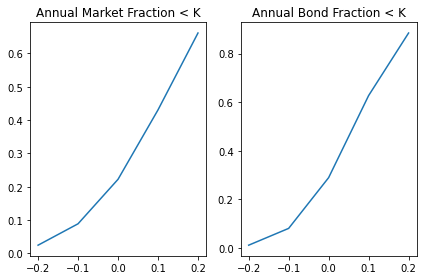

Monthly Market probabilities:  [0.0, 0.0045, 0.4063, 0.9847, 1.0]
Monthly Bond probabilities:  [0.0, 0.0001, 0.4357, 0.9996, 1.0]
----------


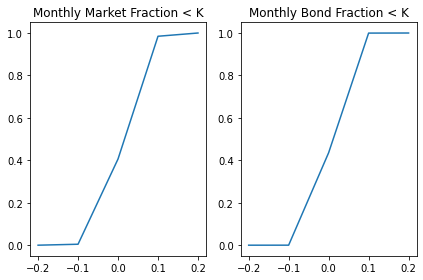

Daily Market probabilities:  [0.0, 0.0, 0.4871, 1.0, 1.0]
Daily Bond probabilities:  [0.0, 0.0, 0.5, 1.0, 1.0]
----------


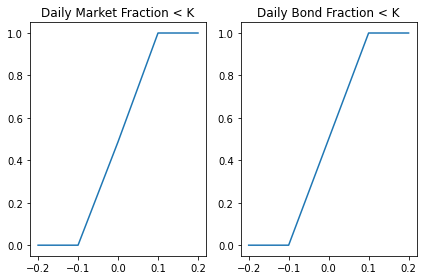

In [8]:
#### Q4A ####

def simulation_normal(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_std = df["mktret"].std()
    bond_mean = df["bondret"].mean()
    bond_std = df["bondret"].std()

    mkt_norm = stats.norm(mkt_mean, mkt_std)
    bond_norm = stats.norm(bond_mean, bond_std)

    mkt_samples = mkt_norm.rvs(size=10000)
    bond_samples = bond_norm.rvs(size=10000)

    k = [-.2, -.1, 0, .1, .2]

    mkt_probs, bond_probs = simulation(mkt_samples, bond_samples, k)
    
    print(frequency + " Market probabilities: ", mkt_probs)
    print(frequency + " Bond probabilities: ", bond_probs)
    print("----------")
    plot(frequency, mkt_probs, bond_probs, k)
    
simulation_normal(data_annual, "Annual")
simulation_normal(data_monthly, "Monthly")
simulation_normal(data_daily, "Daily")

Annual Market probabilities:  [0.0378, 0.1158, 0.2197, 0.3782, 0.5959]
Annual Bond probabilities:  [0.0125, 0.0387, 0.3171, 0.7234, 0.8988]
----------


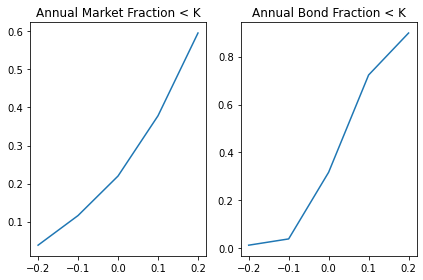

Monthly Market probabilities:  [0.001, 0.0121, 0.3572, 0.9881, 1.0]
Monthly Bond probabilities:  [0.0, 0.0007, 0.4107, 0.9921, 1.0]
----------


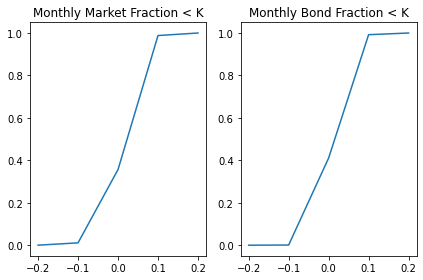

Daily Market probabilities:  [0.0, 0.0001, 0.4536, 1.0, 1.0]
Daily Bond probabilities:  [0.0, 0.0, 0.4178, 1.0, 1.0]
----------


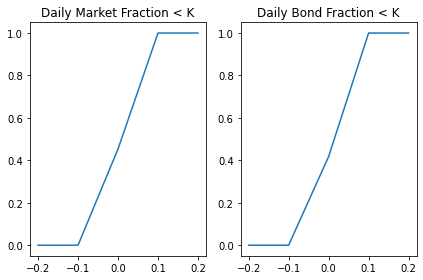

In [9]:
#### Q4B ####

def simulation_empirical(df, frequency):
    mkt_samples = df["mktret"].sample(10000, replace=True).values
    bond_samples = df["bondret"].sample(10000, replace=True).values

    k = [-.2, -.1, 0, .1, .2]

    (mkt_probs, bond_probs) = simulation(mkt_samples, bond_samples, k)
    
    print(frequency + " Market probabilities: ", mkt_probs)
    print(frequency + " Bond probabilities: ", bond_probs)
    print("----------")

    plot(frequency, mkt_probs, bond_probs, k)
    
simulation_empirical(data_annual, "Annual")
simulation_empirical(data_monthly, "Monthly")
simulation_empirical(data_daily, "Daily")

In [10]:
#### Q4C ####

def prob_greater_than_twenty(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_var = df["mktret"].var()
    bond_mean = df["bondret"].mean()
    bond_var = df["bondret"].var()

    print("==============")
    mkt_prob = 1 - stats.norm(5*mkt_mean, np.sqrt(5*mkt_var)).cdf(.2)
    print("Probability Market Ret > 20% " + frequency + ": ", mkt_prob)

    bond_prob = 1 - stats.norm(5 * bond_mean, np.sqrt(5 * bond_var)).cdf(.2)
    print("Probability Bond Ret > 20% " + frequency + ": ", bond_prob)
    
prob_greater_than_twenty(data_annual, "Annual")
prob_greater_than_twenty(data_monthly, "Monthly")
prob_greater_than_twenty(data_daily, "Daily")  

Probability Market Ret > 20% Annual:  0.8777956926546506
Probability Bond Ret > 20% Annual:  0.6649114927690836
Probability Market Ret > 20% Monthly:  0.054978542279975895
Probability Bond Ret > 20% Monthly:  0.0023064267928946114
Probability Market Ret > 20% Daily:  0.0
Probability Bond Ret > 20% Daily:  0.0


In [11]:
#### Q4D ####

def five_consecutive_known(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_var = df["mktret"].var()
    bond_mean = df["bondret"].mean()
    bond_var = df["bondret"].var()

    mkt_norm = stats.norm(5*mkt_mean, np.sqrt(5*mkt_var))
    bond_norm = stats.norm(5*bond_mean, np.sqrt(5*bond_var))

    mkt_samples = mkt_norm.rvs(size=10000)
    bond_samples = bond_norm.rvs(size=10000)
    
    k = [0.2]

    (mkt_probs, bond_probs) = simulation(mkt_samples, bond_samples, k)

    print("============")
    print(frequency + " 5 Consecutive Periods Known Market Prob: ", 1 - mkt_probs[0])
    print(frequency + " 5 Consecutive Periods Known Bond Prob: ", 1 - bond_probs[0])
    
five_consecutive_known(data_annual, "Annual")
five_consecutive_known(data_monthly, "Monthly")
five_consecutive_known(data_daily, "Daily")

Annual 5 Consecutive Periods Known Market Prob:  0.8769
Annual 5 Consecutive Periods Known Bond Prob:  0.6715
Monthly 5 Consecutive Periods Known Market Prob:  0.05479999999999996
Monthly 5 Consecutive Periods Known Bond Prob:  0.0019000000000000128
Daily 5 Consecutive Periods Known Market Prob:  0.0
Daily 5 Consecutive Periods Known Bond Prob:  0.0


In [12]:
#### Q4E ####

def five_consecutive_empirical(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_var = df["mktret"].var()
    bond_mean = df["bondret"].mean()
    bond_var = df["bondret"].var()

    df["mktret_5_sum"] = df["mktret"].rolling(window=5).sum()
    df["bondret_5_sum"] = df["bondret"].rolling(window=5).sum()

    mkt_samples = df["mktret_5_sum"].sample(10000, replace=True).values
    bond_samples = df["bondret_5_sum"].sample(10000, replace=True).values
    
    k = [0.2]

    (mkt_probs, bond_probs) = simulation(mkt_samples, bond_samples, k)

    print("============")
    print(frequency + " 5 Consecutive Periods Empirical Market Prob: ", 1 - mkt_probs[0])
    print(frequency + " 5 Consecutive Periods Empirical Bond Prob: ", 1 - bond_probs[0])
    
five_consecutive_empirical(data_annual, "Annual")
five_consecutive_empirical(data_monthly, "Monthly")
five_consecutive_empirical(data_daily, "Daily")

Annual 5 Consecutive Periods Empirical Market Prob:  0.8969
Annual 5 Consecutive Periods Empirical Bond Prob:  0.6223000000000001
Monthly 5 Consecutive Periods Empirical Market Prob:  0.05030000000000001
Monthly 5 Consecutive Periods Empirical Bond Prob:  0.019399999999999973
Daily 5 Consecutive Periods Empirical Market Prob:  0.0006000000000000449
Daily 5 Consecutive Periods Empirical Bond Prob:  0.00029999999999996696


In [13]:
#### Q4F ####

def prob_stock_lower_than_bond_30(df, frequency):
    mkt_mean = 30*df["mktret"].mean()
    mkt_var = 30*df["mktret"].var()
    bond_mean = 30*df["bondret"].mean()
    bond_var = 30*df["bondret"].var()

    df["mktret_30_sum"] = df["mktret"].rolling(window=30).sum()
    df["bondret_30_sum"] = df["bondret"].rolling(window=30).sum()

    diff_mean = bond_mean - mkt_mean
    cov = df["mktret_30_sum"].cov(df["bondret_30_sum"])
    diff_var = bond_var + mkt_var - 2*cov

    prob = 1 - stats.norm.cdf((0 - diff_mean) / np.sqrt(diff_var))
    print("========")
    print("Probability Bond Ret > Stock Ret over 30 periods " + frequency + ": ", prob)
    
prob_stock_lower_than_bond_30(data_annual, "Annual")
prob_stock_lower_than_bond_30(data_monthly, "Monthly")
prob_stock_lower_than_bond_30(data_daily, "Daily")

Probability Bond Ret > Stock Ret over 30 periods Annual:  0.02826454244093124
Probability Bond Ret > Stock Ret over 30 periods Monthly:  0.28710980338155756
Probability Bond Ret > Stock Ret over 30 periods Daily:  0.42364252409489633
